US Accidents Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

  Kaggle
  informaiton about accidents
  can use useful to prevent accidents
  mention that this does not contain data about New York



Data Preparation and Cleaning

    Load the file using Pandas
    Look at some information about the data & the columns
    Fix any missing or incorrect values



In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

In [6]:
import pandas as pd

In [10]:
df = pd.read_csv(data_filename)

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# counting the numeric data in the dataset
newdf = df.select_dtypes(include=numerics)      
len(newdf.columns)

14

Now we find the Percent of missing values per column

In [15]:
missing_percent = df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percent

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
Country                  0.000000
Junction                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop          

Now we remove those which have percentage 0 by the following code.

In [12]:
[missing_percent!=0]
# This will show true for those which don't have values zero

[Number                    True
 Precipitation(in)         True
 Wind_Chill(F)             True
 Wind_Speed(mph)           True
 End_Lat                   True
 End_Lng                   True
 Visibility(mi)            True
 Weather_Condition         True
 Humidity(%)               True
 Temperature(F)            True
 Wind_Direction            True
 Pressure(in)              True
 Weather_Timestamp         True
 Airport_Code              True
 Timezone                  True
 Zipcode                   True
 Sunrise_Sunset            True
 Civil_Twilight            True
 Nautical_Twilight         True
 Astronomical_Twilight     True
 City                      True
 Country                  False
 Junction                 False
 Start_Time               False
 End_Time                 False
 Start_Lat                False
 Turning_Loop             False
 Traffic_Signal           False
 Traffic_Calming          False
 Stop                     False
 Station                  False
 Roundab

In [13]:
missing_percent[missing_percent!=0]
# this will find the non zero values of the column

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
dtype: float64

<AxesSubplot:>

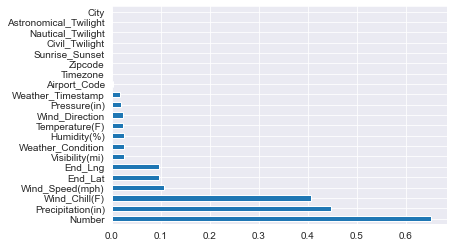

In [16]:
missing_percent[missing_percent!=0].plot(kind='barh')


Removing Columns that we don't want to use

# Exploratory data analysis and visualization
  Columns we will analyze:
  1. City(done)
  2. Start time(done)
  3. Start langitude and Start longitude.
  4. Weather condition.
  5. Temperature

City

In [17]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [18]:
cities = df.City.unique()
len(cities)

11790

In [19]:
cities_by_accident = df.City.value_counts()
# counts the number of accidents city wise
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [20]:
'New York' in df.City
# New york is not there in the list of cities.

False

In [21]:
'NY' in df.State
# # to check wheather New york is there in the list of states.

False

<AxesSubplot:>

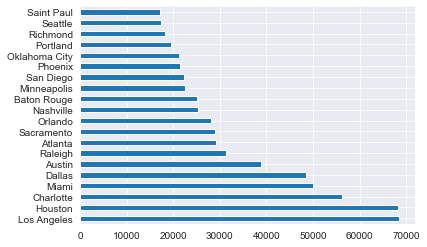

In [22]:
cities_by_accident[:20].plot(kind= 'barh')

In [23]:
import seaborn as sns
sns.set_style("darkgrid")

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

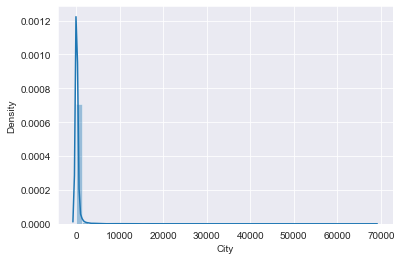

In [26]:
sns.distplot(cities_by_accident)

In [27]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]
low_accident_cities = cities_by_accident[cities_by_accident <=1000]

In [41]:
high_accident_cities

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
San Bruno         1009
Willow Grove      1005
Palmetto          1004
Monterey Park     1003
Dover             1003
Name: City, Length: 513, dtype: int64

In [42]:
len(high_accident_cities)

513

In [46]:
percent_of_high_accident_cities = len(high_accident_cities)/len(cities)*100

In [47]:
percent_of_high_accident_cities

4.351145038167939

<AxesSubplot:xlabel='City', ylabel='Count'>

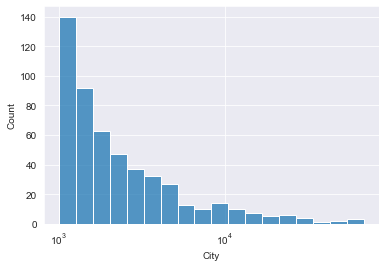

In [56]:
sns.histplot(high_accident_cities, log_scale=True)

In [60]:
cities_by_accident[cities_by_accident == 10 ]

West Collingswood    10
Glenbeulah           10
Ponte Vedra          10
Becket               10
Modoc                10
                     ..
Onarga               10
Mcgregor             10
Newborn              10
Wittenberg           10
Twin City            10
Name: City, Length: 222, dtype: int64

In [49]:
len(low_accident_cities) 

11276

In [52]:
percent_low_accident_cities = len(low_accident_cities)/len(cities)*100

In [53]:
percent_low_accident_cities

95.64037319762511

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

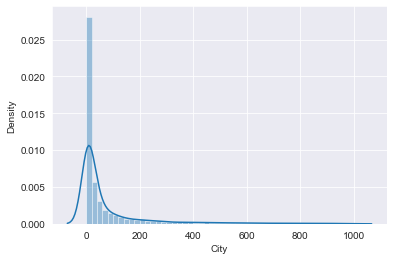

In [54]:
sns.distplot(low_accident_cities)

# Start time

In [61]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [63]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [65]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [68]:
df.Start_Time = pd.to_datetime(df.Start_Time)
# adding a timestamp to the Start_Time column of the data set and replacing the original data in Start_Time with the time stamp

In [67]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [73]:
df.Start_Time.dt.hour
# finding the hour at which the accidents occur.

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

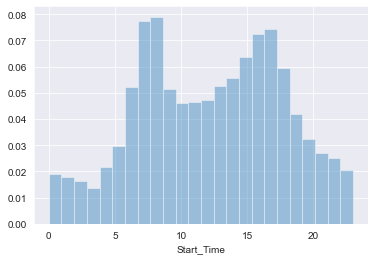

In [81]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)
# norm_hist is ued to find the percent in the yaxis

- A high percent of accident occur b/w 6 to 10 in the morning and 3pm.

<AxesSubplot:xlabel='Start_Time'>

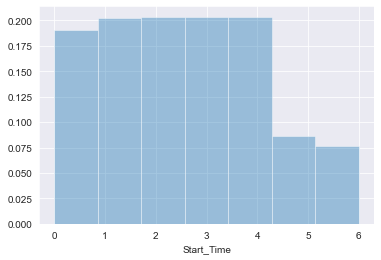

In [83]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)
# bins is used in the x axix for 7days of the week.

IS the distribution of accidents by hour the same as on weekends as on weekdays?

In [86]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

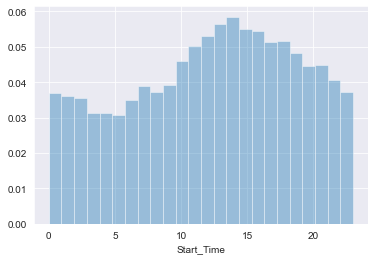

In [89]:
`

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

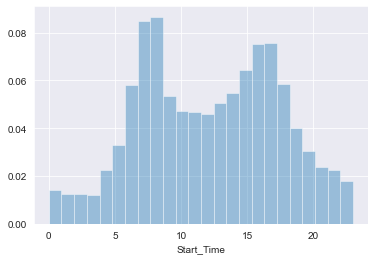

In [90]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

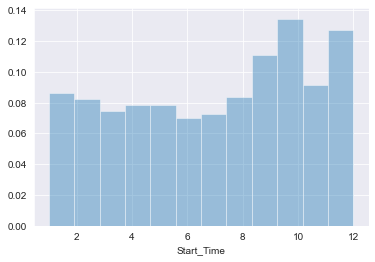

In [93]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

More accidents occur in nov and dec due to winter in 2019

In [101]:
tuesday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 1]

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

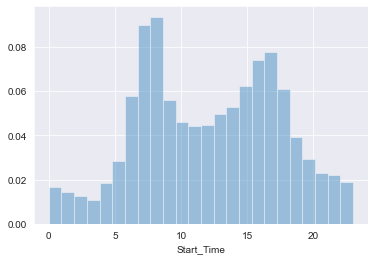

In [102]:
sns.distplot(tuesday_start_time.dt.hour, bins=24, norm_hist=True, kde=False)

In [109]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


# Temperature

In [118]:
df = df.rename(columns={"Temperature(F)": "Temperature"})
# changed the name of the temperature column to access it 

In [119]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [121]:
df.Temperature[0]

76.0

c:\users\manas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature'>

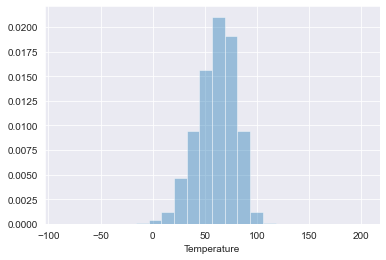

In [122]:
sns.distplot(df.Temperature, bins=24, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Temperature'>

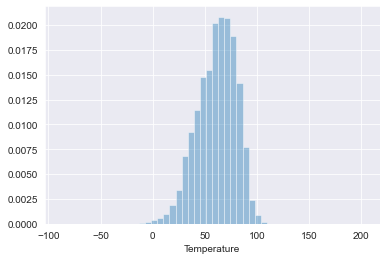

In [129]:
sns.distplot(df.Temperature,kde=False, norm_hist=True)


Max accidents occur b/w 60 degree fahrenheit and 80 degree fahrenheit

In [142]:
df.Zipcode[:20]

0     29607-6027
1     28270-8560
2          95033
3          89705
4          33324
5          28269
6          81650
7          90601
8     37064-5029
9          91355
10    33527-3948
11         10704
12         75041
13    85712-1013
14         07436
15    77057-7203
16         90039
17    92336-1108
18         48081
19         12533
Name: Zipcode, dtype: object

In [145]:
df.Roundabout

0          False
1          False
2          False
3          False
4          False
           ...  
2906605    False
2906606    False
2906607    False
2906608    False
2906609    False
Name: Roundabout, Length: 2906610, dtype: bool

In [146]:
df.Weather_Timestamp

0          2019-05-21 08:53:00
1          2019-10-07 17:53:00
2          2020-12-13 21:53:00
3          2018-04-17 16:55:00
4          2016-08-31 17:53:00
                  ...         
2906605    2018-06-28 08:35:00
2906606    2019-01-10 02:00:00
2906607    2020-11-23 12:53:00
2906608    2019-12-29 22:54:00
2906609    2018-03-26 13:54:00
Name: Weather_Timestamp, Length: 2906610, dtype: object

Questions:
2. Which five states has highest number of accidents??
3. Does New York show up in the data?
   if yes then why the count lower if it is a most populated city?
4. Among the top 100 cities in number of accidents, whuch states do they belong to most frequently?
5. Whuch days of the week has most no of accidents? done
6. which time of the day accidents are more frequent? done
7. Which month has the most accidents? done but not accurate due to missing data


Summary and Conclusion
1. There are 513 cities whch has more than 1000 accidents yearly, which is less than 5% of the total cities.
2. There are 11399 cities with less than 1000 accidents
2. Over 1200 cities has reported just 1 accident(need to investigate).
3. number of accidents increases/decreases exponentially.
